In [31]:
import numpy as np
import pandas as pd 
import librosa

import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Audio

from methods import BasePersistentPattern
from plotting import plot_signal_pattern,plot_pattern

In [2]:
y,sr = librosa.load("/Users/tgermain/Downloads/XC734342 - Rousserolle des buissons - Acrocephalus dumetorum.mp3")

In [3]:
Audio(data = y,rate = sr)

In [4]:
px.line(y[::100])

In [5]:
hop_length = 100
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
signal = mfcc[1]
signal = (signal - np.mean(signal))/np.std(signal)

px.line(signal)

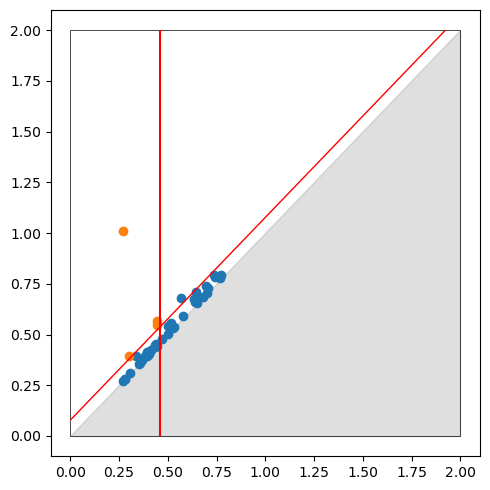

In [6]:
bpp = BasePersistentPattern(200,10,alpha=0.01,beta=0.,n_jobs=4)
bpp.fit(signal)
bpp.plot_persistence_diagram()

In [27]:
from threshold import otsu, _basic_otsu, normal_outliers

In [43]:
def test_otsu(X,nbins = 1024): 
    X = X[X[:,1] - X[:,0]>0]
    births = X[:,0]
    b_cut = _basic_otsu(births,nbins)
    b_cut = _basic_otsu(births[births<b_cut],nbins)
    pers = np.diff(X[X[:,0]<b_cut],axis=1).reshape(-1)
    pers = pers[pers>0]
    pers.sort()
    idx = np.where(normal_outliers(pers,0.95))[0][0]
    p_cut = (pers[idx-1]+pers[idx])/2
    return p_cut,b_cut

(array([2.59193729, 1.72795819, 3.88790593, 3.02392683, 1.29596864,
        1.29596864, 0.43198955, 1.72795819, 1.72795819, 2.15994774]),
 array([0.27155817, 0.32188145, 0.37220473, 0.42252801, 0.47285129,
        0.52317457, 0.57349785, 0.62382113, 0.6741444 , 0.72446768,
        0.77479096]),
 <BarContainer object of 10 artists>)

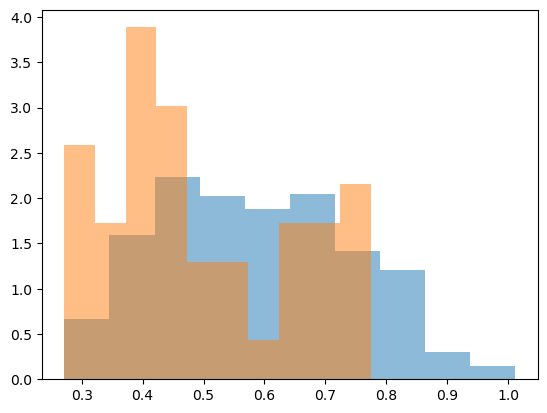

In [44]:
pers = bpp.get_persistence(True)[:,:-1]
plt.hist(pers[:,0],alpha = 0.5,density = True)
plt.hist(pers[pers[:,1] - pers[:,0]>0][:,0],density = True, alpha = 0.5)

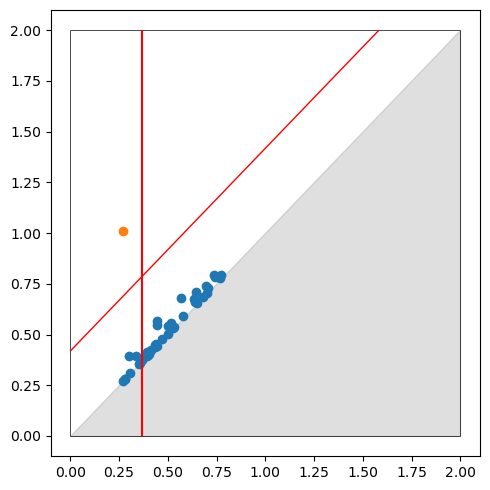

In [45]:
bpp.set_cut_values(*test_otsu(bpp.get_persistence(True)[:,:-1]))
bpp.plot_persistence_diagram()

(<Figure size 2000x500 with 1 Axes>, <Axes: >)

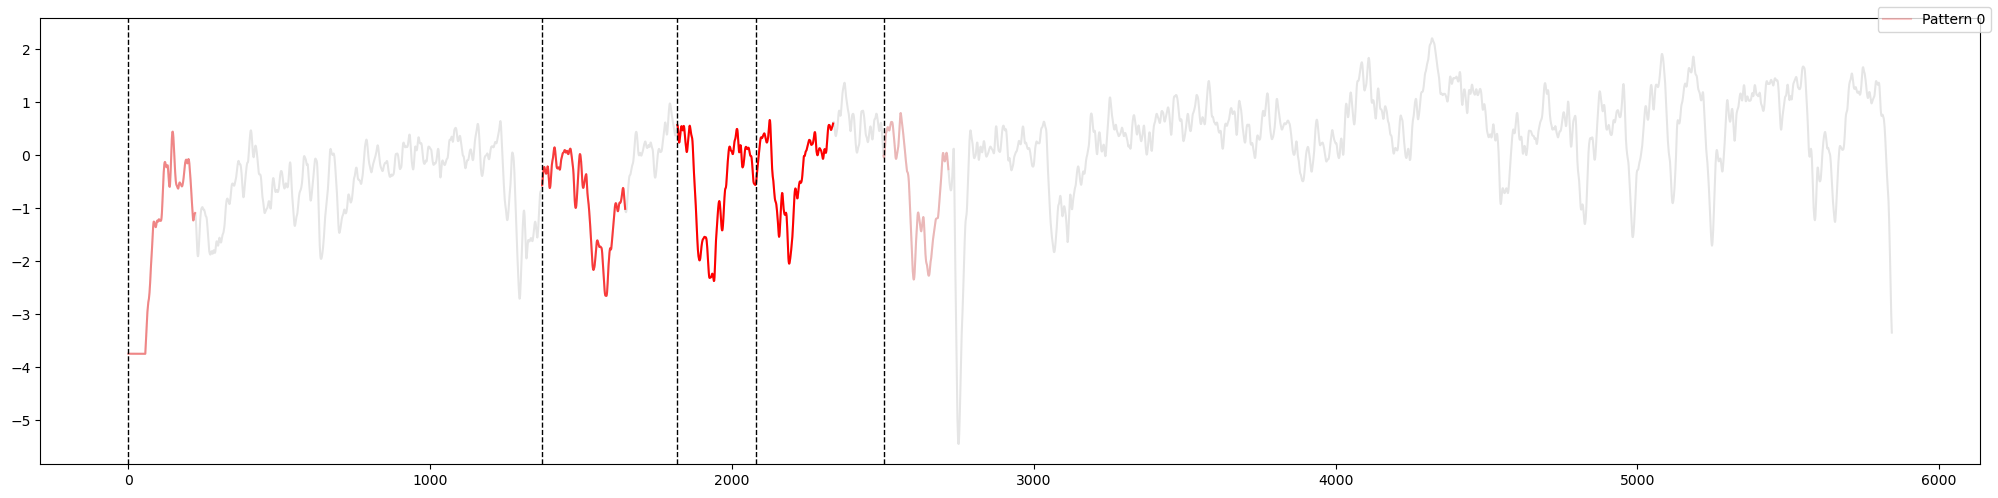

In [46]:
plot_signal_pattern(signal,*bpp.prediction_birth_list_)